# Simulations with Differential Equations
Last week we spend a great deal of time in the class discussing the bouncing
ball model. In that model, we started with defining the ball's motion first working out 
it's acceptation from rest under the effect of gravity. It was then quite easy to derive 
the speed and hight by means of simple integration. 
In man application domains, this straightforward integration can not be carried
out. The system in those cases is described by a differential equations. In this
weeks lecture, we considered a simple class of such differential equations,
known as [Homogeneous Differential
Equations](http://www.mathsisfun.com/calculus/differential-equations-homogeneous.html).

We will consider here two examples of such systems. We will start with a first
order linear example of heat transfer problem, then we ill continue with second
order non-linear example involving pendulum motion. 


## Heat transfer, how would you like you beverage?
We consider the temperature of beverage after being taken out of the fridge. We
want know what the temperature will be like after being left for a few minutes
at room temperature. This can be nicely approximated by [Newton's law of
cooling](https://en.wikipedia.org/wiki/Newton's_law_of_cooling#Temperature_function-of-time_solution_in_terms_of_object_heat_capacity):

$$\frac{d T(t)}{d t} = - r (T(t) - T_{\mathrm{env}}). \quad \text{(1)}$$

Here $r$ is some constant the describe the rate of conduction. This can be
solved analytically to give
$$T(t) = T_{\mathrm{env}} + (T(0) - T_{\mathrm{env}}) \ e^{-r t}. \quad $$

However, are are more interested here in finding how to the numerical
integration of the ODE. We will use here [Euler
method](https://en.wikipedia.org/wiki/Euler_method). 

Applying this method to our problem, the temperature can be expressed as 
$$T(t)=T(t-\delta t) + \delta t \frac{d T(t-\delta t )}{d t},$$ 
where $\delta t$ is a small fixed constant. Expanding using (1), this becomes 
$$T(t)=T(t-\delta t) -  r (T(t-\delta t) - T_{\mathrm{env}})\delta t , $$
with
$$T(0)=T_{\mathrm{bottle}},$$
where $T_{\mathrm{bottle}}$ is the temperature of the bottle immediately after
it was taken out of the fridge. So provided $r$, $T_{\mathrm{bottle}}$, and $T_{\mathrm{env}}$ 
we can use the above two equations to an iterate to find the bottle's temperature at any point in time. 

### Heat transfer simulation 


In [1]:
# First we define our constants
r=0.2 # Coefficient of conductivity 
T_env=22 # Room temperature 
T_bottle=5 # The temperature of the beverage
dTdt(T)=-r*(T-T_env) # Newton's Law of Cooling

dTdt (generic function with 1 method)

Testing some values

In [2]:
dTdt(22)

-0.0

In [3]:
dTdt(0)

4.4

In [4]:
dTdt(T_bottle)

3.4000000000000004

In [5]:
"Writing a general function for EulerIntegration for a first order ODE"
function EulerIntegration(firstOrderFunction,initialValue,timeStep,endTime)
    time_range=0:timeStep:endTime
    values=Array(Float64,length(time_range))
    values[1]=initialValue
    for i=2:length(time_range)
        derivative=firstOrderFunction(values[i-1])
        values[i]=values[i-1]+derivative*timeStep
    end
    time_range, values
end

EulerIntegration

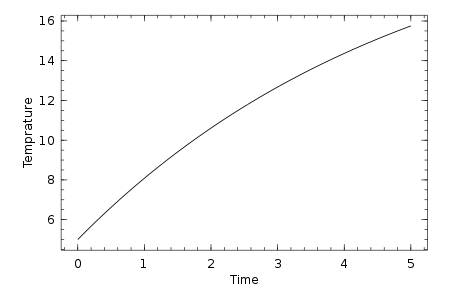

In [6]:
using Winston # For plotting... you can add the package by Pkg.add("Winston")

# Plotting at different end times to get a suitable range
t_range, Temps=EulerIntegration(dTdt, T_bottle, 0.01, 5);
plot(t_range,Temps); xlabel("Time"); ylabel("Temprature")

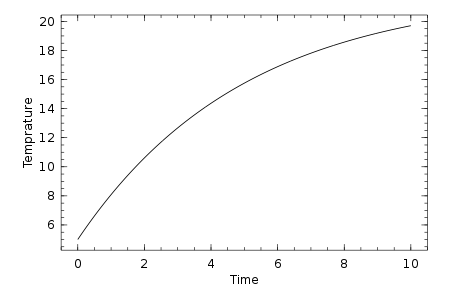

In [7]:
t_range, Temps=EulerIntegration(dTdt, T_bottle, 0.01, 10);
plot(t_range,Temps); xlabel("Time"); ylabel("Temprature")

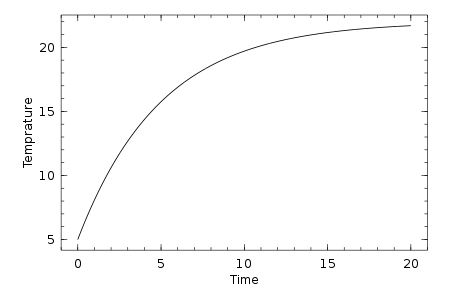

In [8]:
t_range, Temps=EulerIntegration(dTdt, T_bottle, 0.01, 20);
plot(t_range,Temps); xlabel("Time"); ylabel("Temprature")

We well settle at $t=20$ as the temperature at this point is asymptotically
close to $T_{\mathrm{env}}$.  

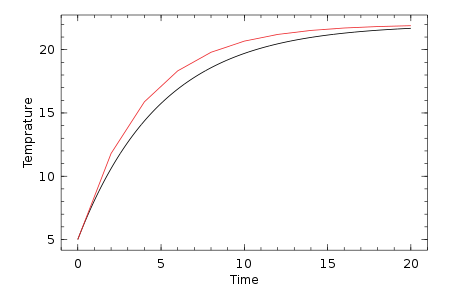

In [9]:
# Checking the effect of coarser time step 
t_range2, Temps2=EulerIntegration(dTdt, T_bottle, 2, 20);
plot(t_range,Temps,t_range2,Temps2); xlabel("Time"); ylabel("Temprature")

We see the for the coarser time step we overestimate the temprature. In Winston the order of the colors is 
1. Black
2. Red
3. Green

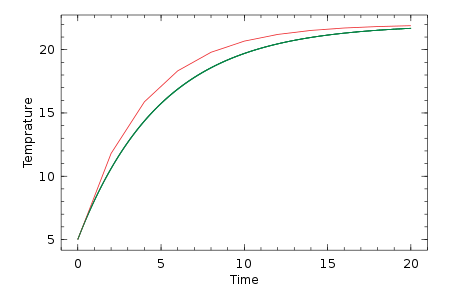

In [10]:
# Checking the effect of finer time step
t_range3, Temps3=EulerIntegration(dTdt, T_bottle, 0.0001, 20);
plot(t_range,Temps,t_range2,Temps2,t_range3,Temps3); xlabel("Time"); ylabel("Temprature")

Finally, we can compare our numerical solution with the analytical one. 

In [11]:
T(t)=T_env+(T_bottle-T_env)*exp(-r*t) #The analytic solution

T (generic function with 1 method)

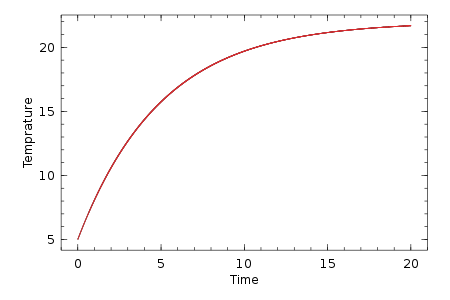

In [12]:
plot(t_range3,Temps3, t_range3, T.(t_range3)); xlabel("Time"); ylabel("Temprature")

Here they perfectly match. This says that our Euler procedure with the time step defined is pretty good approximation of the problem. 

### Lab warm up questions on heat transfer 
1. What is exactly the temperature at t=10?
2. What is the difference between the exact solution at t=10 and the Euler
   solution with a time step of 2.5?
3. Would decreasing the time step to 1 increase of decrease the error. 

## Swinging Pendulum Model
The equation of motion of "simple pendulum" under gravity is defined as 
$$\frac{d^2\theta}{dt^2}+\frac{g}{\ell} \sin\theta=0.$$
The deviations of this equation as well as meaning of the symbols can be found
in an [excellent wikipedia article](https://en.wikipedia.org/wiki/pendulum_%28mathematics%29%23Simple_gravity_pendulum). 
The nature of the problem is such that it has not closed form solution (without
an infinite number of terms). It is a non-linear ordinary differential equation. 
The problem is typically defined with this initial condition of $\theta(0)$ set
to some value with the angular velocity initially set to zero.

Another way to write the above equation using dot notation is 

$$\ddot\theta+\frac{g}{\ell} \sin\theta=0. \quad \text{(2)}$$

In a small time span $\delta t$ we can approach the problem in similar manner as
before with 
$$\begin{align}
\theta(t) &=\theta(t-\delta t)+\dot \theta(t-\delta t)\delta t, \quad \text{(3)}
\end{align}$$ 
for the angle. And 
$$\begin{align}
\dot \theta(t) &=\dot \theta(t-\delta t)+\ddot \theta(t-\delta t)\delta t\\
     &= \dot \theta(t-\delta t)- \frac{g}{\ell} \sin\theta(t-\delta t) \delta t, \quad \text{(4)}
\end{align}$$
for the angular velocity.
This is a straight forward application of the Euler method, described earlier. Equations (3) and (4), in conjunction with initial conditions are all we need to proceed forward. 


### Swinging Pendulum Simulation
We can proceed with extending our Euler method for second order problems. 

In [13]:
# First we define our constants
g=9.81
l=1.0
theta_0=π/2 #90 degress from vertical 
theta_dot_0=0 #Initially angular velocity set to zero;

In [14]:
"Writing a specific function for EulerIntegration for the simple pendelum"
function EulerIntegrationPendulum(theta_0,theta_dot_0,timeStep,endTime)
    time_range=0:timeStep:endTime
    theta=Array(Float64,length(time_range))
    theta[1]=theta_0
    theta_dot=theta_dot_0
    for i=2:length(time_range)
        theta[i]=theta[i-1]+theta_dot*timeStep
        theta_dot=theta_dot-g/l*sin(theta[i-1])*timeStep
    end
    time_range, theta
end

EulerIntegrationPendulum

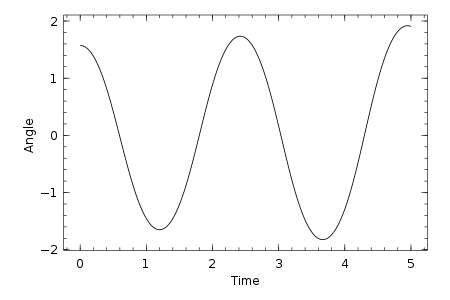

In [15]:
# Plotting at different end times to get a suitable range
t_range, thetas=EulerIntegrationPendulum(theta_0, theta_dot_0, 0.01, 5);
plot(t_range,thetas); xlabel("Time"); ylabel("Angle")

Lets extend the time a to 20 seconds 

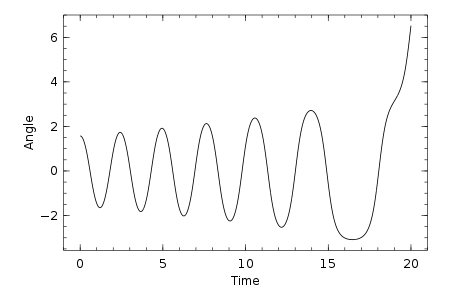

In [16]:
t_range, thetas=EulerIntegrationPendulum(theta_0, theta_dot_0, 0.01, 20);
plot(t_range,thetas); xlabel("Time"); ylabel("Angle")

See how the oscillations are increasing in amplitude and going wild! This is
probably due to instability in our procedure. We can compare with a smaller
$\delta t$. 

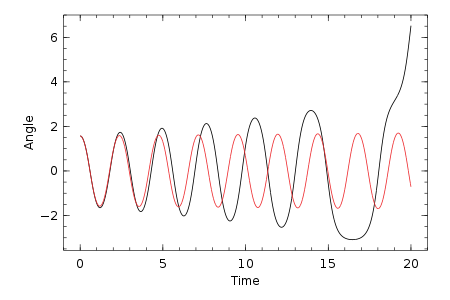

In [17]:
# Plotting at different end times to get a suitable range
t_range, thetas=EulerIntegrationPendulum(theta_0, theta_dot_0, 0.01, 20);
t_range2, thetas2=EulerIntegrationPendulum(theta_0, theta_dot_0, 0.001, 20);
plot(t_range,thetas,t_range2,thetas2); xlabel("Time"); ylabel("Angle")

We conclude from the above the decreasing the time step ten fold, improves the stability, but for how long? Lets try this new time step for 60 seconds. 

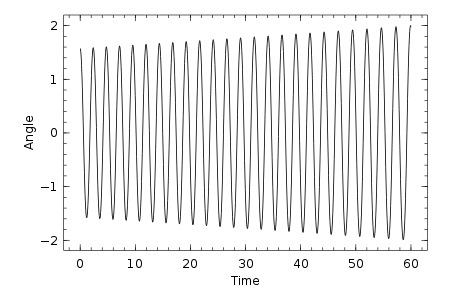

In [18]:
t_range, thetas=EulerIntegrationPendulum(theta_0, theta_dot_0, 0.001, 60);
plot(t_range,thetas); xlabel("Time"); ylabel("Angle")

Notice how the amplitude of the swing seems to gradually growing. We can now
conclude that this simple method for solving ODEs is not well suited for the
long term prediction of the simple pendulum. We have to try something else. 

### Industrial strength ODE solvers 
Solving differential equations numerically is a topic deserving of an entire
course. Suffice to say that the Euler Method is but the simplest approach and is
not well suited high order problems with non-linearities. For what follows next,
we will use one of Julia's [Ordinary Differential Equations](https://github.com/JuliaDiffEq/ODE.jl) package. 

To proceed, we will have to resort to using the [_state space_](https://en.wikipedia.org/wiki/State-space_representation#Pendulum_example) representation of our ODE. Here we will use two variables to capture the dynamics of our system 

- $x_1(t)=\theta(t)$ is the angle of the pendulum
- $x_2(t)=\dot \theta(t)$ is the angular velocity 

We can now rewrite equation (2) as 
$$\begin{align}
\dot x_1(t) &= x_2(t) \\
\dot x_2(t) &= -\frac{g}{\ell}\sin x_1(t)
\end{align}$$

That form of representation, is the one that is used by most ODE solvers. 


In [19]:
using ODE # install using Pkg.add("ODE")

We need to create a function that would return the vector $[\dot x_1(t), \dot x_2(t)]^T$ given the input vector $[x_1(t), x_2(t)]^T$ using the above equations. 

In [20]:
function simple_pendulum(t,x)
    dx=Array(Float64,2)
    dx[1] = x[2]
    dx[2] = -g/l*sin(x[1])
    dx #return dx
end

simple_pendulum (generic function with 1 method)

In [21]:
x_0=[theta_0,theta_dot_0] # vector of initial conditions
tspan=0.0:0.1:60.0 #The time span
t_acc,res=ode45(simple_pendulum,x_0,tspan) #Running the solver
thetas_acc=map(x->x[1],res) # Extracing the angle from the results;

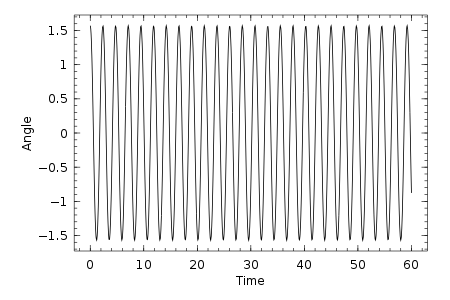

In [22]:
# Plotting the results
plot(t_acc,thetas_acc); xlabel("Time"); ylabel("Angle")

This appears a great deal more stable compared the last results. We now compare them. 

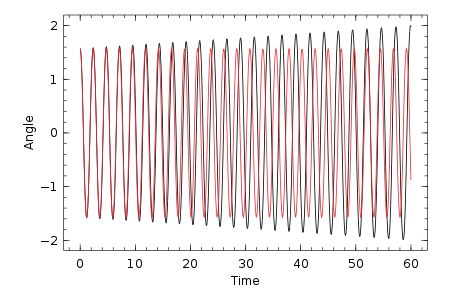

In [23]:
plot(t_range,thetas,t_acc,thetas_acc); xlabel("Time"); ylabel("Angle")

Clearly here the amplitude is stable and does not grow overtime. 

### A quick intro to Chaos
Nonlinear systems often have the property that they are very sensitive to
initial conduction. In [Chaos Theory](https://en.wikipedia.org/wiki/Chaos_theory), this is known as the [butterfly effect](https://en.wikipedia.org/wiki/Butterfly_effect). We can see that by comparing the trajectory of two pendulums that start swinging within a minuscule fraction of angle of each other. 

In [24]:
x_0=[theta_0,theta_dot_0] # vector of initial conditions
tspan=0.0:0.1:20.0 #The time span
t_acc1,res1=ode45(simple_pendulum,x_0,tspan) #Running the solver
thetas_acc1=map(x->x[1],res1) # Extracing the angle from the results;
x_0_p=[theta_0+0.1,theta_dot_0] # vector of initial conditions
t_acc2,res2=ode45(simple_pendulum,x_0_p,tspan) #Running the solver
thetas_acc2=map(x->x[1],res2) # Extracing the angle from the results;

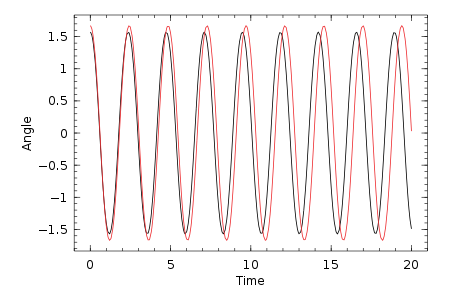

In [25]:
plot(t_acc1,thetas_acc1,t_acc2,thetas_acc2); xlabel("Time"); ylabel("Angle")

Initially that tenth of radian did not seem to affect things much. Lets how how they change over a larger time span.

In [26]:
x_0=[theta_0,theta_dot_0] # vector of initial conditions
tspan=0.0:0.01:100.0 #The time span
t_acc1,res1=ode45(simple_pendulum,x_0,tspan) #Running the solver
thetas_acc1=map(x->x[1],res1) # Extracing the angle from the results;
x_0_p=[theta_0+0.1,theta_dot_0] # vector of initial conditions
t_acc2,res2=ode45(simple_pendulum,x_0_p,tspan) #Running the solver
thetas_acc2=map(x->x[1],res2) # Extracing the angle from the results;

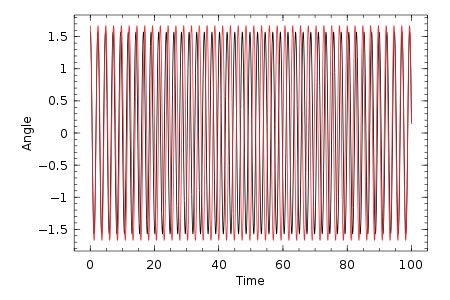

In [27]:
plot(t_acc1,thetas_acc1,t_acc2,thetas_acc2); xlabel("Time"); ylabel("Angle")

This picture is not very clear. To get a clearer picture, we can plot the difference between the two trajectories. 

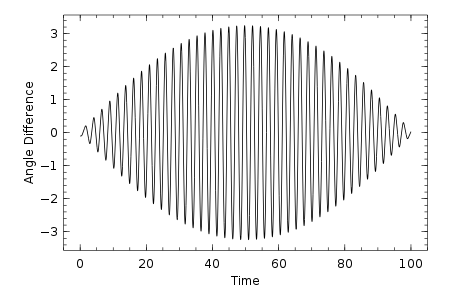

In [28]:
plot(tspan,thetas_acc1[isinteger.(round.(t_acc1*100,5))]-thetas_acc2[isinteger.(round.(t_acc2*100,5))]); xlabel("Time"); ylabel("Angle Difference")

The above command may appear a little complicted, but bassically they go completly out of phase around $t=50$ seconds. We can zoom in on the trajectory around that time to get clearer picture. 

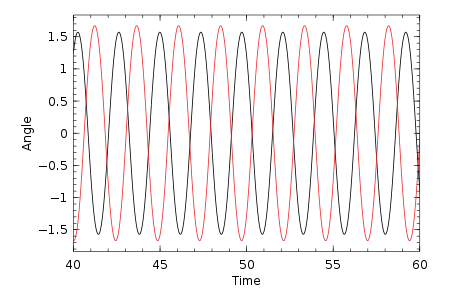

In [29]:
plot(t_acc1,thetas_acc1,t_acc2,thetas_acc2); xlabel("Time"); ylabel("Angle")
xlim(40,60)

We see that they are completely out of phase here as indicated by the previous figure. 
If we were consider that we are using the pendulums to keep time, then we should be going concerned how they will deviate from each other over time. 

### Lab warm up questions on the simple pendulum  
1. Would changing decreasing the time step in last Euler plot improve stability
   when viewed  $t=600$?
2. What is the effect of adding an initial starting angular velocity (say $\dot \theta_0=0.5$) on the period (time it take for the pendulum to return to its exact starting point)? Pendulums were used for time keeping, how does you observation here affect time keeping accuracy?
3. Is a longer pendulum, slower or faster?
4. How does decreasing or increasing the pendulum's starting angle affect its
   speed of oscillation?  
5. How is this pendulum model different from a realistic pendulum? What would a more realistic model include?
